In [1]:
import pandas as pd

In [3]:
alex_prices = pd.read_csv("/kaggle/input/alex-5y-prices/Alexandria - 5Y.csv")

alex_prices = alex_prices[["year", "AVG price per metter  EGB"]]
alex_prices

,year,AVG price per metter EGB
0,2020,12340
1,2021,14526
2,2022,15671
3,2023,16914
4,2024,20289


In [4]:
alex_prices_2y = pd.read_csv("/kaggle/input/alex-2y/Alexandria - 2Y.csv")

def clean_prices(price):
    return price.replace(',', '').split(" ")[1]
years = alex_prices_2y.columns[2:]
for year in years:
    alex_prices_2y[year] = alex_prices_2y[year].apply(clean_prices)
    alex_prices_2y[year] = alex_prices_2y[year].astype(int)
alex_prices_2y

,Area,Bedrooms No.,Jul 2023,Jul 2024,Mar 2023,Mar 2024,Nov 2022,Nov 2023
0,Alexandria,1,22786,28289,21736,25577,20624,22508
1,Alexandria,2,15563,21708,13993,17998,14344,16882
2,Alexandria,3,15790,20724,14270,17540,14700,16187
3,Alexandria,4,15283,27014,15412,19871,14740,15457
4,Alexandria,5,16098,20276,14473,17044,16030,16996
5,Alexandria,6,22379,25233,21069,25233,20914,24770


In [5]:
years = alex_prices_2y.columns[2:]
alex_prices_recent = alex_prices_2y.T.loc[years].iloc[:, 1:-1]
alex_prices_recent_mean = alex_prices_recent.T.mean().reset_index()

alex_prices_recent_mean.columns = ["Date", "Price Per Meter"]
alex_prices_recent_mean

,Date,Price Per Meter
0,Jul 2023,15683.5
1,Jul 2024,22430.5
2,Mar 2023,14537.0
3,Mar 2024,18113.25
4,Nov 2022,14953.5
5,Nov 2023,16380.5


In [6]:
alex_prices_recent_mean['Date'] = pd.to_datetime(alex_prices_recent_mean['Date'], format='%b %Y')
alex_prices_recent_mean.to_csv("alex_2y.csv")

In [7]:
alex_prices_recent_mean['Date'] = pd.to_datetime(alex_prices_recent_mean['Date'], format='%b %Y')
alex_prices_recent_mean_q = alex_prices_recent_mean.groupby(alex_prices_recent_mean['Date'].dt.to_period('Q').astype(str))['Price Per Meter'].mean().reset_index()
alex_prices_recent_mean_q

,Date,Price Per Meter
0,2022Q4,14953.5
1,2023Q1,14537.0
2,2023Q3,15683.5
3,2023Q4,16380.5
4,2024Q1,18113.25
5,2024Q3,22430.5


In [9]:
alex_prices = pd.read_csv("/kaggle/input/alex-5y-prices/Alexandria - 5Y.csv")

alex_prices = alex_prices[["year", "AVG price per metter  EGB"]]
alex_prices = alex_prices.iloc[:2]
alex_prices['Date'] = alex_prices['year'].astype(str) + 'Q4'
alex_prices = alex_prices.rename(columns={alex_prices.columns[1]: 'Price Per Meter'})
alex_prices

,year,Price Per Meter,Date
0,2020,12340,2020Q4
1,2021,14526,2021Q4


In [87]:
quarters = pd.date_range(start='2020-01-01', end='2024-12-31', freq='Q')
quarters = pd.DataFrame({'Quarter': quarters})
quarters['Date'] = quarters['Quarter'].dt.to_period('Q').astype(str)

In [88]:
q_prices = pd.merge(alex_prices_recent_mean_q, df2, on='Date', how='outer')
q_prices.head()

,Date,Price Per Meter,Quarter
0,2022Q4,14953.5,2022-12-31
1,2023Q1,14537.0,2023-03-31
2,2023Q3,15683.5,2023-09-30
3,2023Q4,16380.5,2023-12-31
4,2024Q1,18113.25,2024-03-31


In [89]:
q_prices = pd.merge(q_prices, alex_prices, on=['Date', 'Price Per Meter'], how='outer')
q_prices = q_prices[["Date", "Price Per Meter"]]
q_prices['Date'] = pd.PeriodIndex(q_prices['Date'], freq='Q')
q_prices = q_prices.sort_values(by='Date').reset_index(drop=True)
q_prices.head()

,Date,Price Per Meter
0,2020Q1,NaN
1,2020Q2,NaN
2,2020Q3,NaN
3,2020Q4,12340
4,2020Q4,NaN


In [90]:
aqarmap_indx = pd.read_csv("/kaggle/input/aqarmap-price-index/aqarmap_price_index")
aqarmap_indx['Date'] = pd.to_datetime(aqarmap_indx['Year'].astype(str) + '-' + aqarmap_indx['Month'].astype(str))

aqarmap_indx = aqarmap_indx.groupby(aqarmap_indx['Date'].dt.to_period('Q'))['Points'].mean().reset_index()
aqarmap_indx.head()

,Date,Points
0,2012Q3,1756.000000
1,2012Q4,1721.333333
2,2013Q1,1757.000000
3,2013Q2,1572.500000
4,2013Q3,1721.000000


In [92]:
start_period = pd.Period('2017Q1', freq='Q')
end_period = pd.Period('2024Q4', freq='Q')

aqarmap_indx = aqarmap_indx[(aqarmap_indx['Date'] >= start_period) & (aqarmap_indx['Date'] <= end_period)].reset_index(drop=True)
aqarmap_indx.head()

,Date,Points
0,2017Q1,2664.666667
1,2017Q2,2522.000000
2,2017Q3,3046.666667
3,2017Q4,2926.500000
4,2018Q1,3000.500000


In [93]:
prices_points = pd.merge(q_prices, filtered_df, on='Date', how='outer')
prices_points = prices_points.sort_values(by='Date').reset_index(drop=True)
prices_points = prices_points.drop_duplicates(subset='Date').reset_index(drop=True)
prices_points.head()

,Date,Price Per Meter,Points
0,2017Q1,NaN,2664.666667
1,2017Q2,NaN,2522.000000
2,2017Q3,NaN,3046.666667
3,2017Q4,NaN,2926.500000
4,2018Q1,NaN,3000.500000


In [97]:
alex_gdp = pd.read_csv("/kaggle/input/alex-gdp/GDP by Governorate.csv")

alex_gdp = alex_gdp[["Year", "Real Estate Ownership"]]
alex_gdp.head()

,Year,Real Estate Ownership
0,2021/2020,45997204.73
1,2020/2019,41842150.96
2,2019/2018,35029275.15
3,2018/2017,29389762.49
4,2017/2016,23802724.58


In [98]:
alex_gdp['Date'] = alex_gdp['Year'].apply(lambda x: f"{x.split('/')[1]}Q4")
alex_gdp = alex_gdp[["Date", "Real Estate Ownership"]]
alex_gdp = alex_gdp.head(4)
alex_gdp['Date'] = pd.PeriodIndex(alex_gdp['Date'], freq='Q-DEC')
alex_gdp

,Date,Real Estate Ownership
0,2020Q4,45997204.73
1,2019Q4,41842150.96
2,2018Q4,35029275.15
3,2017Q4,29389762.49


In [46]:
prices_points = pd.merge(prices_points, alex_gdp, on='Date', how='outer')

In [99]:
inflation_rate = pd.read_excel("/kaggle/input/inflation-rate/Inflations Historical.xlsx", header=1)
inflation_rate.head()

,Date,Headline (m/m),Core (m/m),Regulated Items (m/m),Fruits and Vegetables (m/m)
0,Nov 2024,0.520%,0.420%,3.800%,-7.580%
1,Oct 2024,1.104%,1.303%,1.330%,-1.420%
2,Sep 2024,2.081%,0.962%,2.789%,11.897%
3,Aug 2024,2.052%,0.938%,2.948%,12.344%
4,Jul 2024,0.395%,-0.490%,0.253%,12.778%


In [100]:
inflation_rate = inflation_rate[["Date", "Core (m/m)"]]
inflation_rate = inflation_rate.dropna()
inflation_rate["Core (m/m)"] = inflation_rate["Core (m/m)"].str.replace("%", "").astype(float)
inflation_rate['Date'] = pd.to_datetime(inflation_rate['Date'], format='%b %Y')
inflation_rate = inflation_rate.groupby(inflation_rate['Date'].dt.to_period('Q'))['Core (m/m)'].mean().reset_index()
inflation_rate = inflation_rate[(inflation_rate['Date'] >= start_period) & (inflation_rate['Date'] <= end_period)].reset_index(drop=True)
prices_points = pd.merge(prices_points, inflation_rate, on='Date', how='outer')

In [102]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp = IterativeImputer(max_iter=10, random_state=0)
X = prices_points.drop('Date', axis=1)
prices_imputed = pd.DataFrame(imp.fit_transform(X), columns=X.columns)

prices_imputed["Date"] = prices_points["Date"]
prices_imputed

,Price Per Meter,Points,Core (m/m),Date
0,13300.169162,2664.666667,2.858000,2017Q1
1,12948.498227,2522.000000,1.627333,2017Q2
2,14241.947237,3046.666667,1.089667,2017Q3
3,13945.723323,2926.500000,0.548000,2017Q4
4,14128.155431,3000.500000,0.421000,2018Q1
5,14734.986548,3246.666667,1.416333,2018Q2
6,14634.765222,3206.000000,0.366667,2018Q3
7,13471.165794,2734.000000,0.469333,2018Q4
8,12996.190565,2541.333333,0.614333,2019Q1
9,13370.085932,2693.000000,0.625333,2019Q2


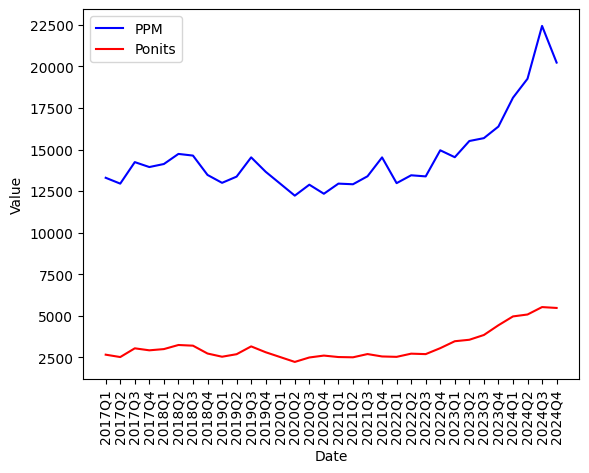

In [103]:
import matplotlib.pyplot as plt

# Plot both lines
prices_imputed["Date"] = prices_imputed["Date"].astype(str)
plt.plot(prices_imputed["Date"], prices_imputed["Price Per Meter"], label='PPM', color='blue')
plt.plot(prices_imputed["Date"], prices_imputed["Points"], label='Ponits', color='red')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.xticks(rotation=90)

# Add legend
plt.legend()

In [85]:
prices_imputed.to_csv("alex_prices_2017_2024.csv")